In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "liguria"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,7,Liguria,1,0,1,0,1,1,1,...,0.0,38.0,0.0,0.0,0.00,100.00,2.63,0.00,0.00,0.000
1,2020-02-26T18:00:00,7,Liguria,6,0,6,5,11,10,10,...,0.0,27.0,0.0,5.0,0.00,54.55,37.04,0.00,0.00,1000.000
2,2020-02-27T18:00:00,7,Liguria,9,0,9,10,19,8,8,...,0.0,12.0,0.0,5.0,0.00,47.37,66.67,0.00,0.00,72.727
3,2020-02-28T18:00:00,7,Liguria,9,0,9,10,19,0,0,...,0.0,34.0,0.0,0.0,0.00,47.37,0.00,0.00,0.00,0.000
4,2020-02-29T17:00:00,7,Liguria,4,1,5,33,38,19,23,...,0.0,9.0,0.0,23.0,20.00,13.16,255.56,0.00,0.00,121.053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2020-11-13T17:00:00,7,Liguria,1372,110,1482,13403,14885,224,1209,...,18.0,7278.0,2913.0,214.0,7.42,9.96,16.61,41.50,0.92,8.246
263,2020-11-14T17:00:00,7,Liguria,1402,108,1510,13824,15334,449,1091,...,30.0,6167.0,2496.0,421.0,7.15,9.85,17.69,43.71,-1.82,7.330
264,2020-11-15T17:00:00,7,Liguria,1393,115,1508,14230,15738,404,822,...,21.0,4850.0,1724.0,406.0,7.63,9.58,16.95,47.68,6.48,5.361
265,2020-11-16T17:00:00,7,Liguria,1381,111,1492,14409,15901,163,365,...,15.0,2205.0,880.0,179.0,7.44,9.38,16.55,41.48,-3.48,2.319


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 17, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 685
Nuovi tamponi: 5670.0
Percentuale nuovi positivi/nuovi tamponi: 12.1 %
Nuovi guariti: 35.0
Nuovi deceduti: 20.0
Variazione positivi ricoverati con sintomi: 12.0
Variazione positivi in terapia intensiva: 6.0
Variazione positivi in isolamento dimiciliare: 612.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 17, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-18T17:00:00,7,Liguria,141,16,157,1257,1414,56,158,...,0.0,3955.0,1912.0,49.0,10.19,11.10,3.99,8.26,6.67,11.635
1,2020-09-19T17:00:00,7,Liguria,140,16,156,1277,1433,19,78,...,2.0,2666.0,1446.0,20.0,10.26,10.89,2.93,5.39,0.00,5.516
2,2020-09-20T17:00:00,7,Liguria,136,15,151,1310,1461,28,85,...,3.0,2049.0,1084.0,33.0,9.93,10.34,4.15,7.84,-6.25,5.932
3,2020-09-21T17:00:00,7,Liguria,145,15,160,1365,1525,64,64,...,0.0,1353.0,690.0,55.0,9.38,10.49,4.73,9.28,0.00,4.381
4,2020-09-22T17:00:00,7,Liguria,148,17,165,1365,1530,5,105,...,1.0,2642.0,1494.0,0.0,10.30,10.78,3.97,7.03,13.33,6.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-13T17:00:00,7,Liguria,1372,110,1482,13403,14885,224,1209,...,18.0,7278.0,2913.0,214.0,7.42,9.96,16.61,41.50,0.92,8.246
57,2020-11-14T17:00:00,7,Liguria,1402,108,1510,13824,15334,449,1091,...,30.0,6167.0,2496.0,421.0,7.15,9.85,17.69,43.71,-1.82,7.330
58,2020-11-15T17:00:00,7,Liguria,1393,115,1508,14230,15738,404,822,...,21.0,4850.0,1724.0,406.0,7.63,9.58,16.95,47.68,6.48,5.361
59,2020-11-16T17:00:00,7,Liguria,1381,111,1492,14409,15901,163,365,...,15.0,2205.0,880.0,179.0,7.44,9.38,16.55,41.48,-3.48,2.319


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

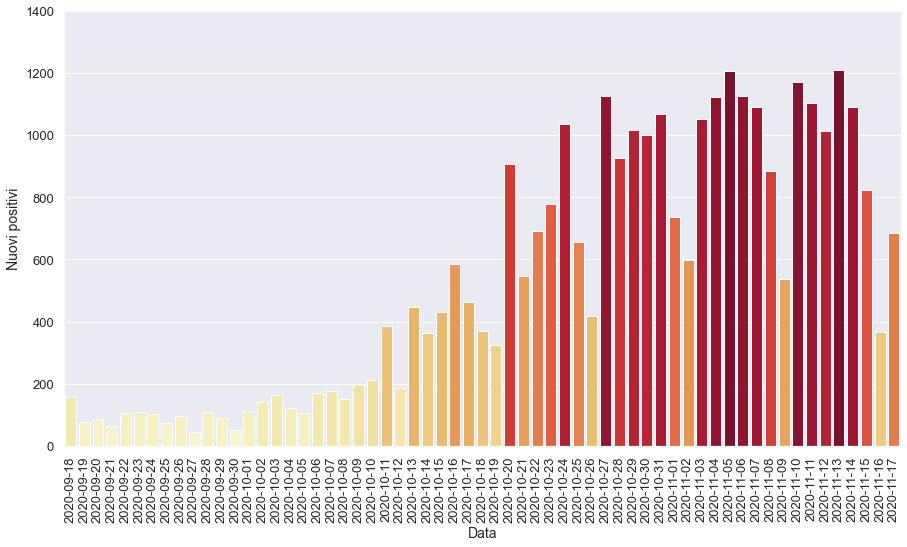

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

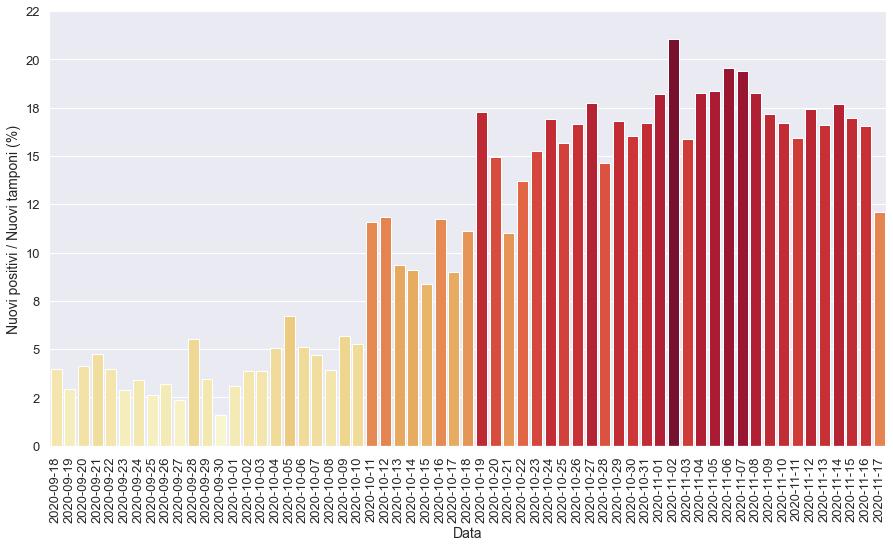

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

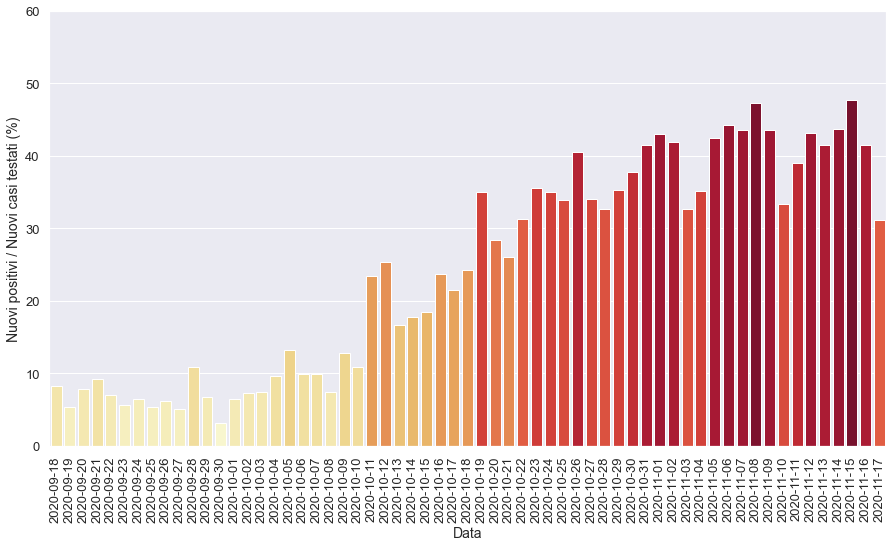

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

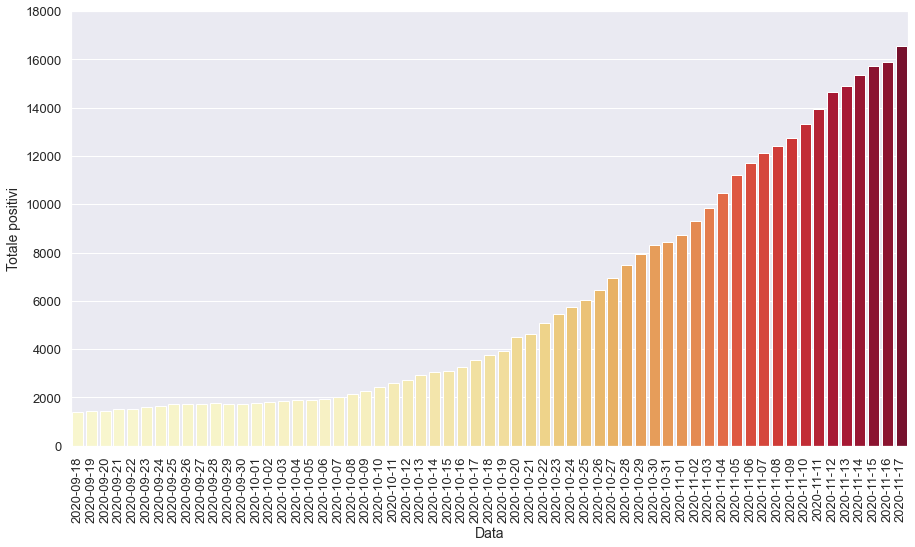

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

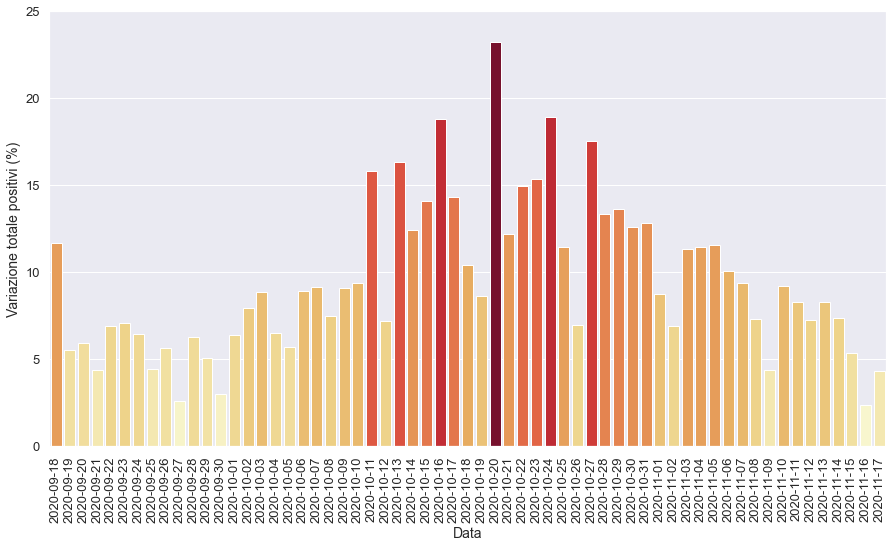

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

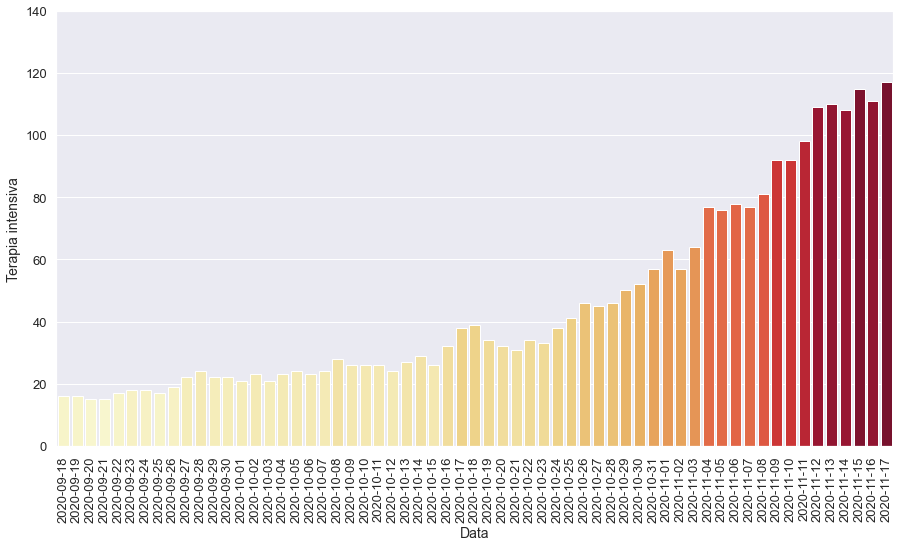

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

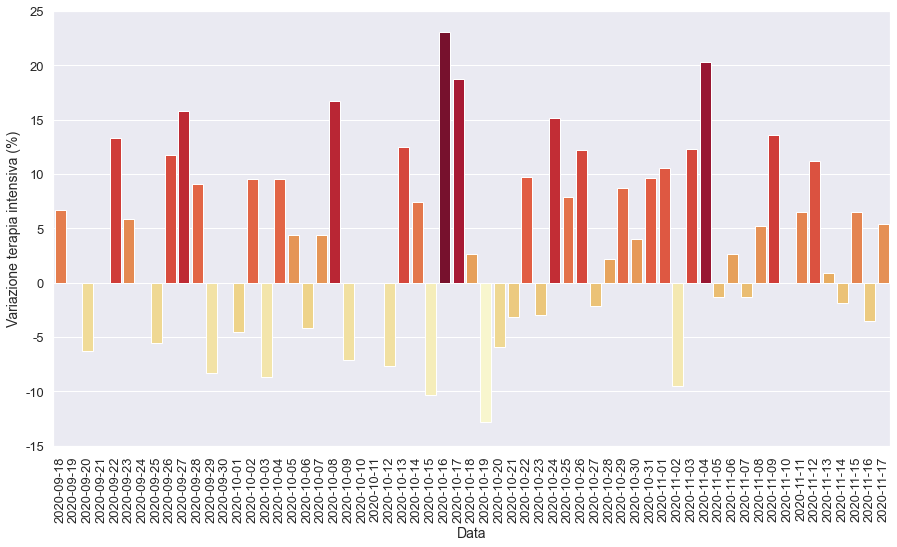

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

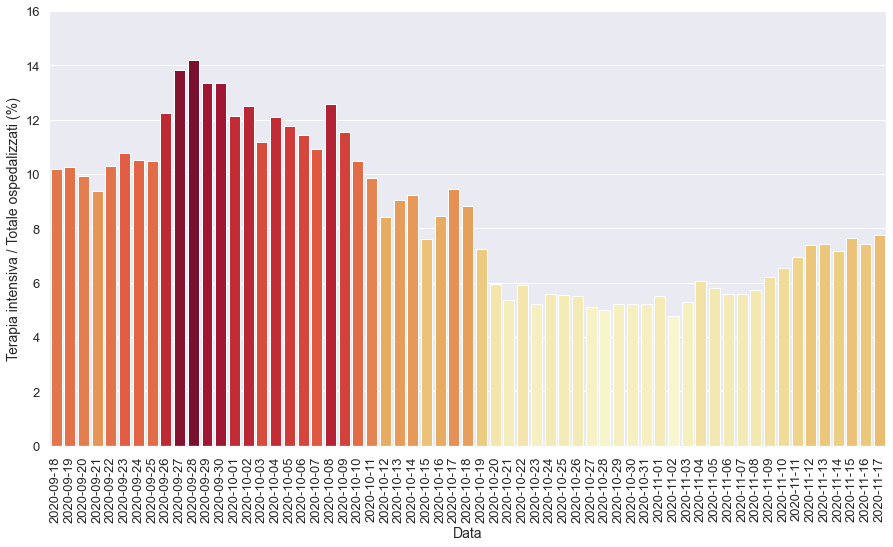

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

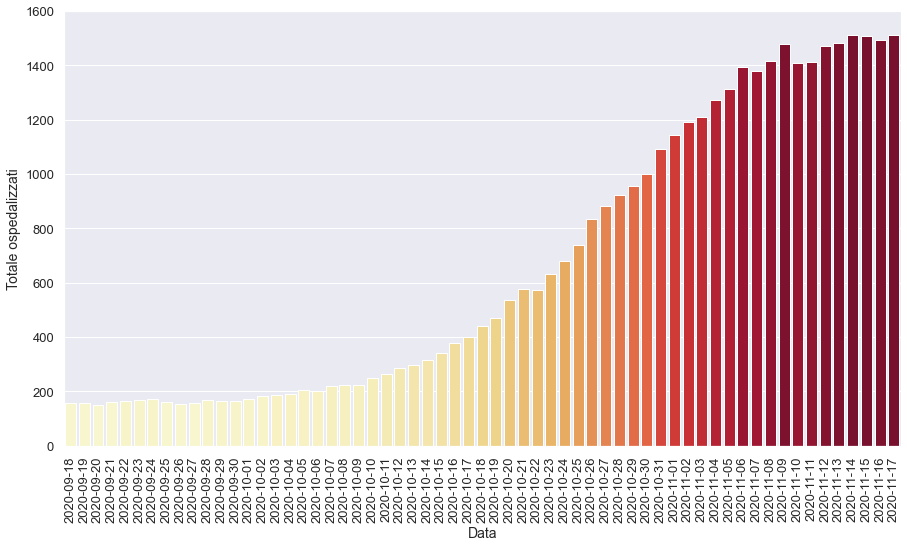

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

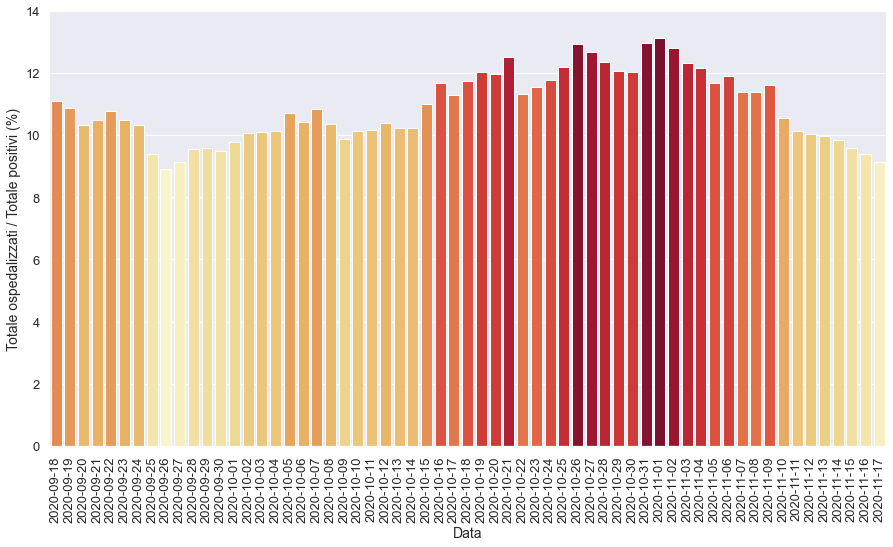

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

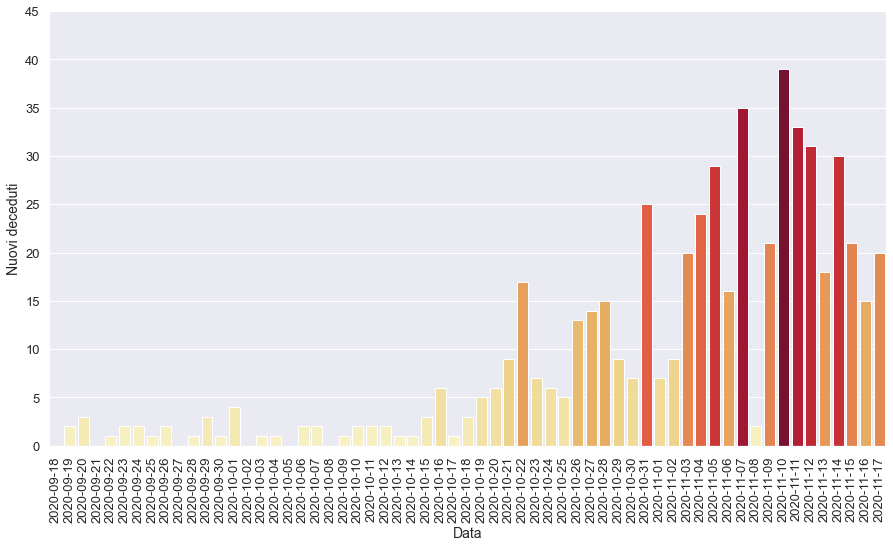

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

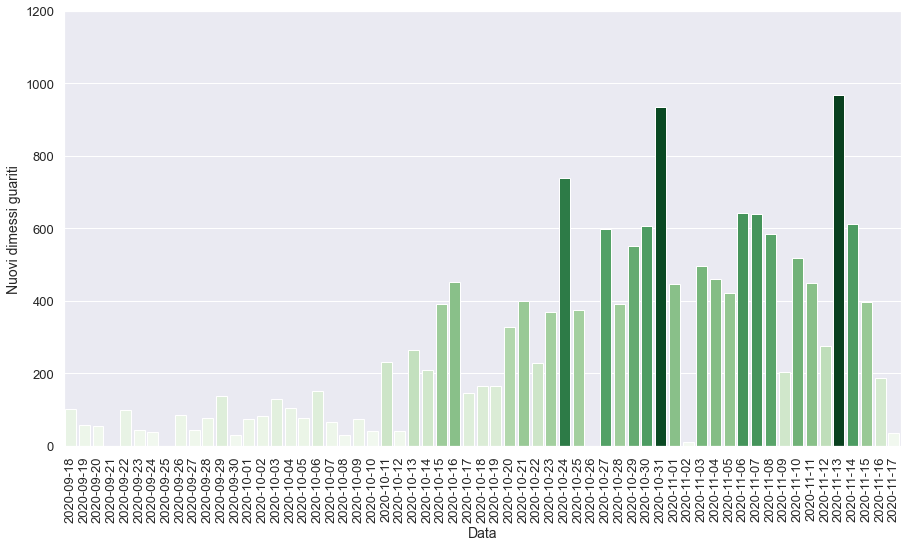

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-18T17:00:00,7,Liguria,402,39,441,3318,3759,201,370,...,3.0,3328.0,1529.0,162.0,8.84,11.73,11.12,24.20,2.63,10.399
1,2020-10-19T17:00:00,7,Liguria,436,34,470,3441,3911,152,323,...,5.0,1871.0,922.0,123.0,7.23,12.02,17.26,35.03,-12.82,8.593
2,2020-10-20T17:00:00,7,Liguria,505,32,537,3947,4484,573,907,...,6.0,6062.0,3199.0,506.0,5.96,11.98,14.96,28.35,-5.88,23.191
3,2020-10-21T17:00:00,7,Liguria,547,31,578,4043,4621,137,546,...,9.0,4950.0,2096.0,96.0,5.36,12.51,11.03,26.05,-3.12,12.177
4,2020-10-22T17:00:00,7,Liguria,540,34,574,4492,5066,445,690,...,17.0,5039.0,2200.0,449.0,5.92,11.33,13.69,31.36,9.68,14.932
5,2020-10-23T17:00:00,7,Liguria,598,33,631,4838,5469,403,778,...,7.0,5096.0,2186.0,346.0,5.23,11.54,15.27,35.59,-2.94,15.357
6,2020-10-24T17:00:00,7,Liguria,641,38,679,5081,5760,291,1035,...,6.0,6114.0,2951.0,243.0,5.60,11.79,16.93,35.07,15.15,18.925
7,2020-10-25T17:00:00,7,Liguria,696,41,737,5299,6036,276,657,...,5.0,4195.0,1938.0,218.0,5.56,12.21,15.66,33.90,7.89,11.406
8,2020-10-26T17:00:00,7,Liguria,788,46,834,5608,6442,406,419,...,13.0,2519.0,1034.0,309.0,5.52,12.95,16.63,40.52,12.20,6.942
9,2020-10-27T17:00:00,7,Liguria,837,45,882,6075,6957,515,1127,...,14.0,6357.0,3306.0,467.0,5.10,12.68,17.73,34.09,-2.17,17.495


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

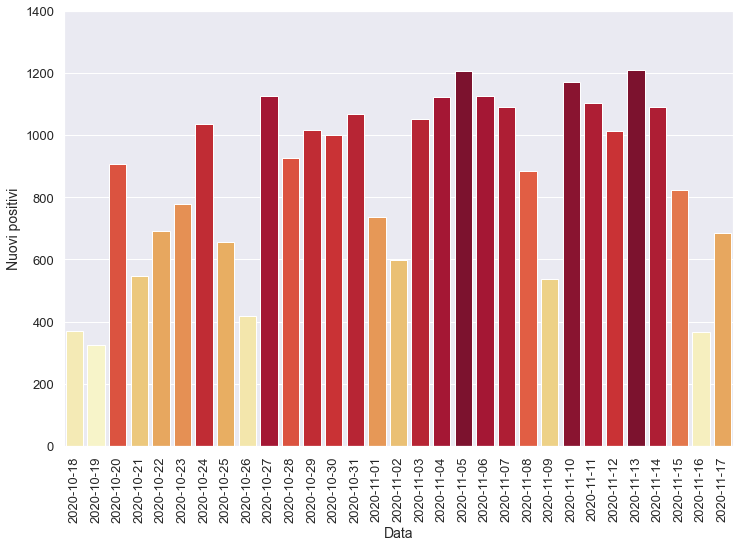

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

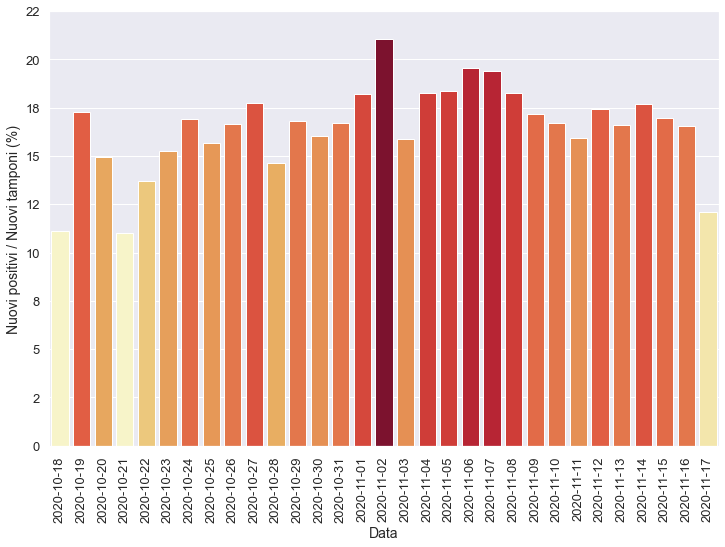

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

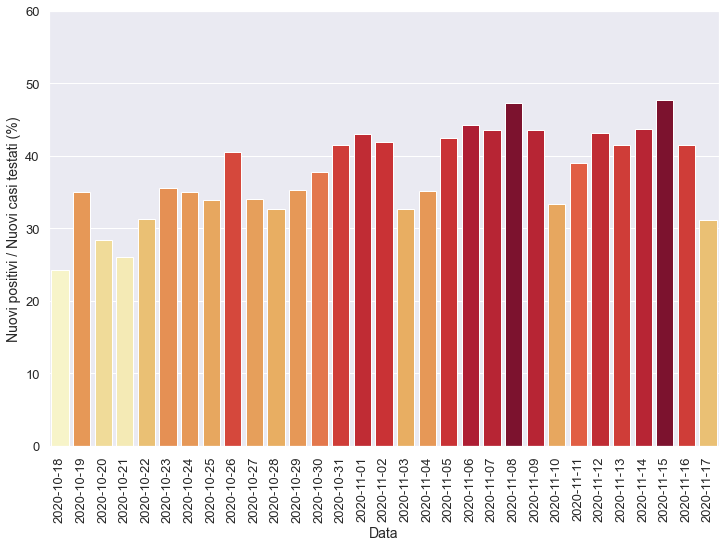

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

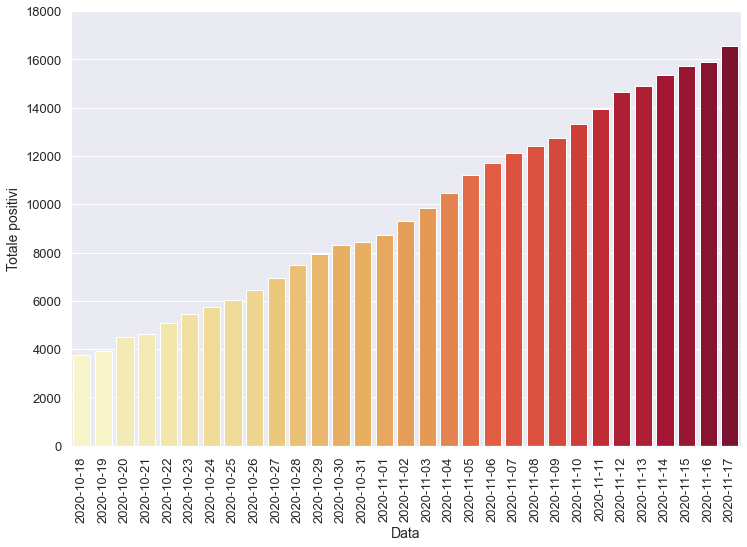

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

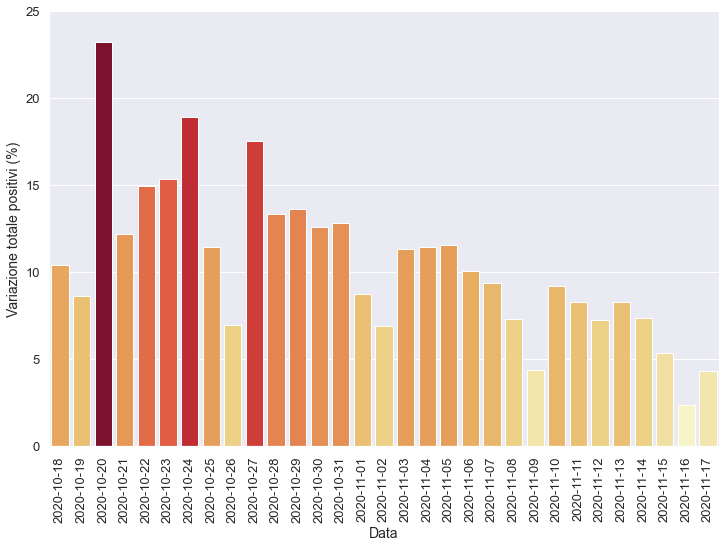

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

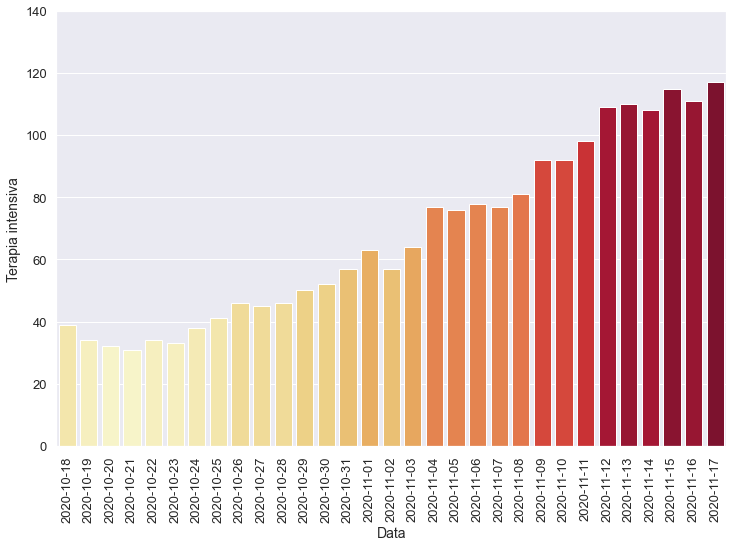

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

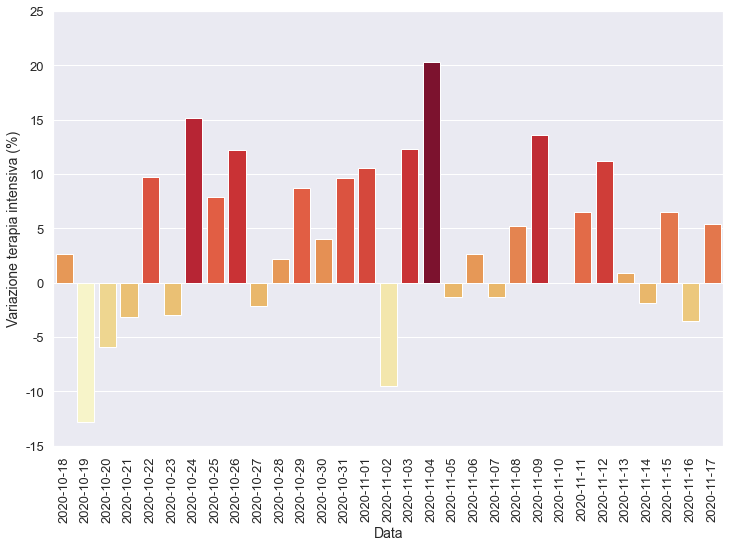

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

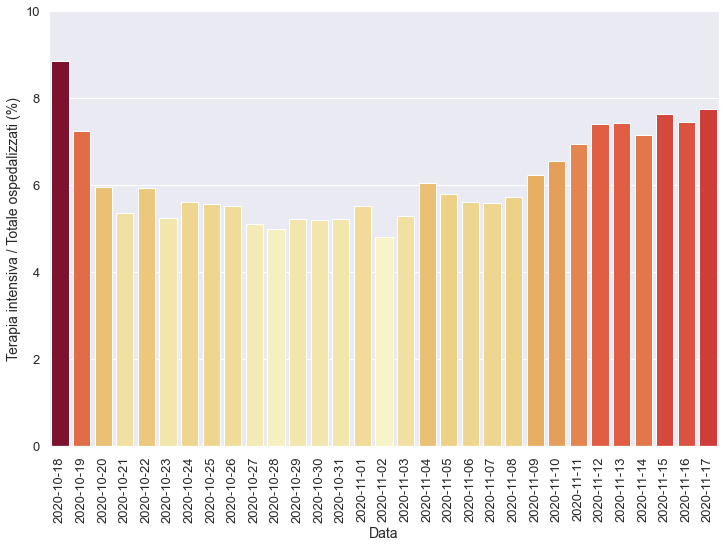

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

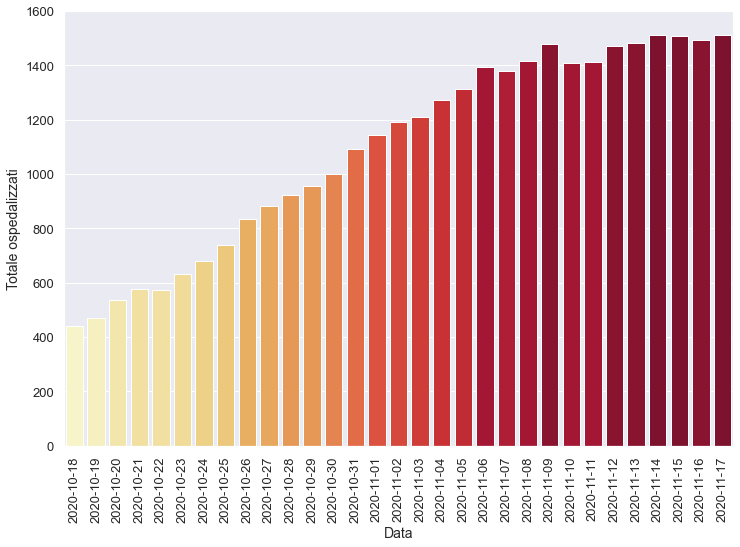

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

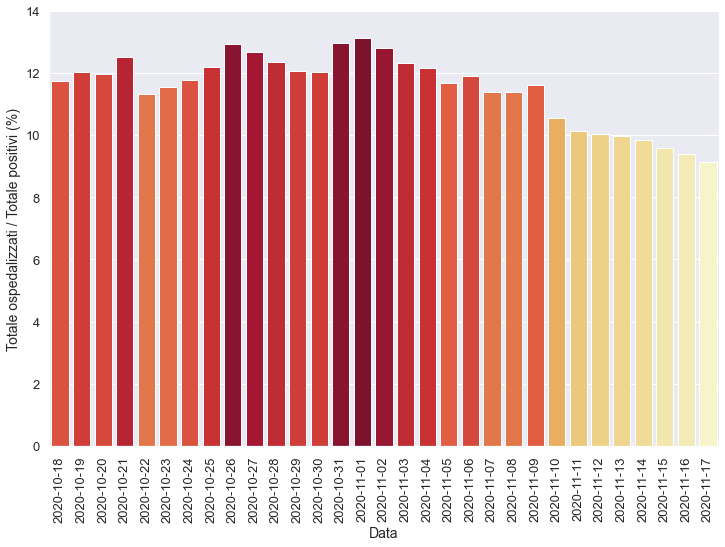

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

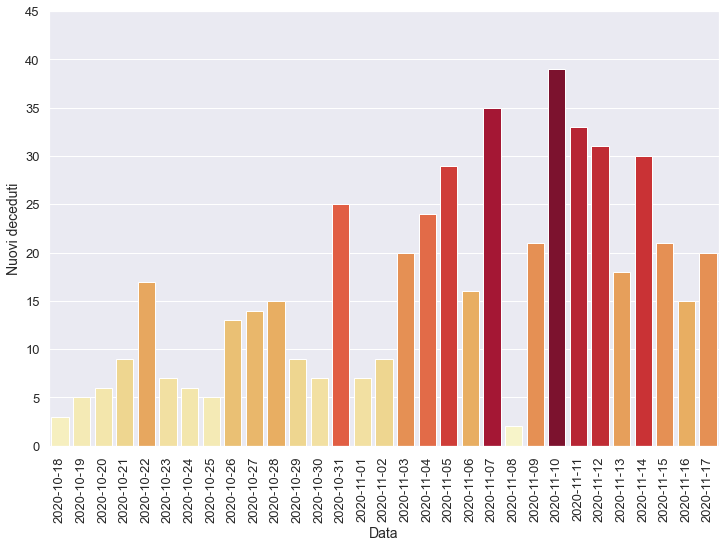

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

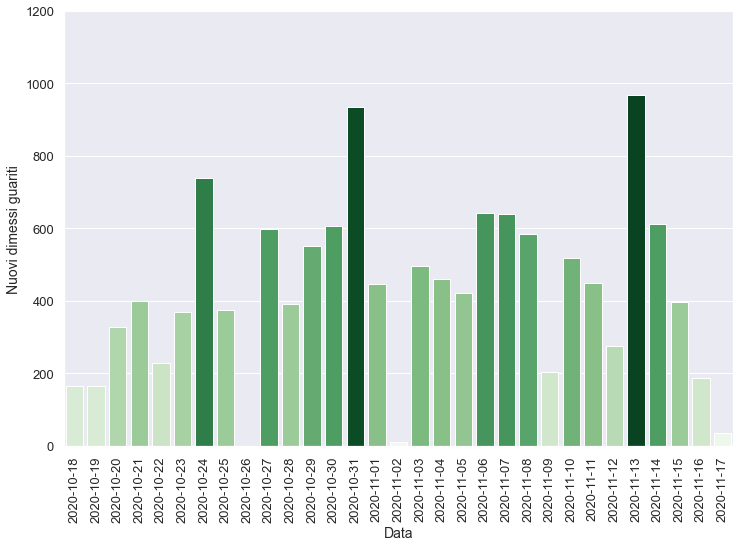

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-10T17:00:00,7,Liguria,1315,92,1407,11929,13336,615,1172,...,39.0,7022.0,3513.0,687.0,6.54,10.55,16.69,33.36,0.00,9.213
1,2020-11-11T17:00:00,7,Liguria,1315,98,1413,12542,13955,619,1102,...,33.0,6922.0,2822.0,613.0,6.94,10.13,15.92,39.05,6.52,8.263
2,2020-11-12T17:00:00,7,Liguria,1363,109,1472,13189,14661,706,1013,...,31.0,5807.0,2344.0,647.0,7.40,10.04,17.44,43.22,11.22,7.259
3,2020-11-13T17:00:00,7,Liguria,1372,110,1482,13403,14885,224,1209,...,18.0,7278.0,2913.0,214.0,7.42,9.96,16.61,41.50,0.92,8.246
4,2020-11-14T17:00:00,7,Liguria,1402,108,1510,13824,15334,449,1091,...,30.0,6167.0,2496.0,421.0,7.15,9.85,17.69,43.71,-1.82,7.330
5,2020-11-15T17:00:00,7,Liguria,1393,115,1508,14230,15738,404,822,...,21.0,4850.0,1724.0,406.0,7.63,9.58,16.95,47.68,6.48,5.361
6,2020-11-16T17:00:00,7,Liguria,1381,111,1492,14409,15901,163,365,...,15.0,2205.0,880.0,179.0,7.44,9.38,16.55,41.48,-3.48,2.319
7,2020-11-17T17:00:00,7,Liguria,1393,117,1510,15021,16531,630,685,...,20.0,5670.0,2198.0,612.0,7.75,9.13,12.08,31.16,5.41,4.308


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

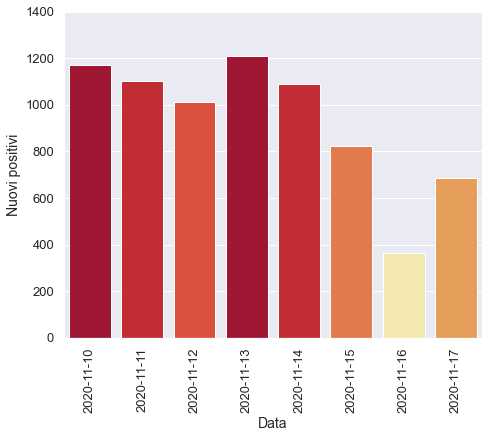

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

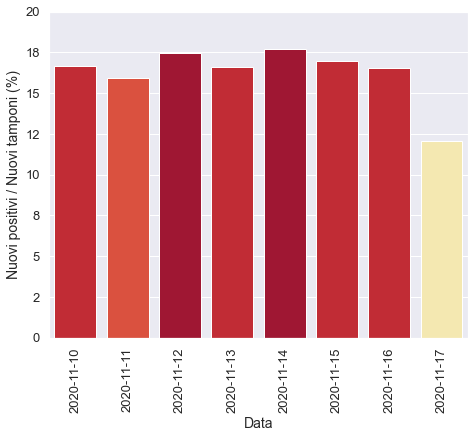

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

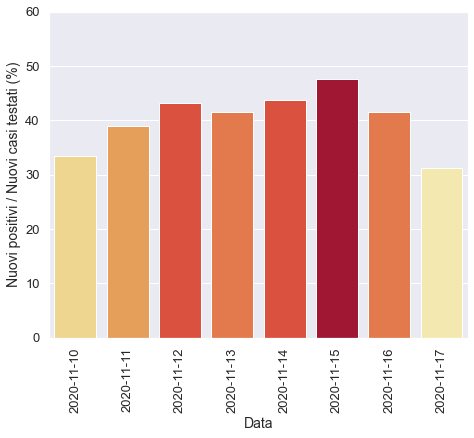

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

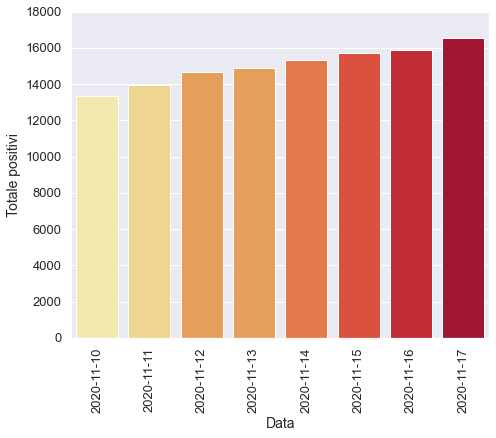

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

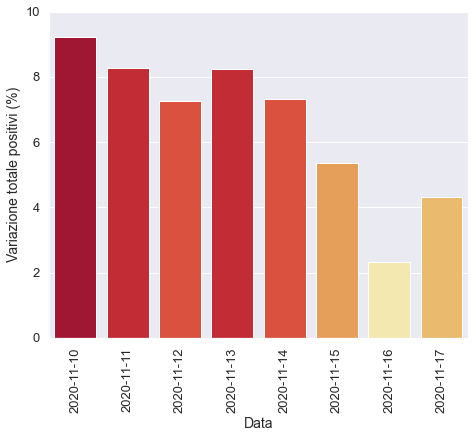

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

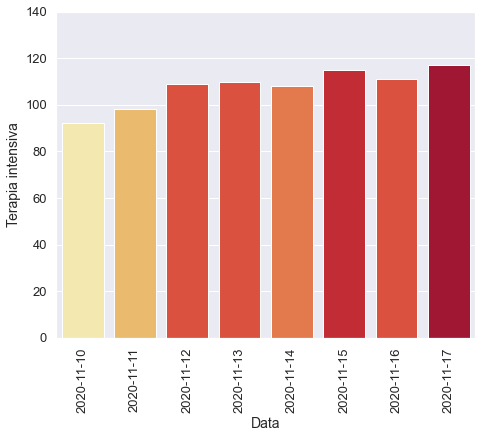

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

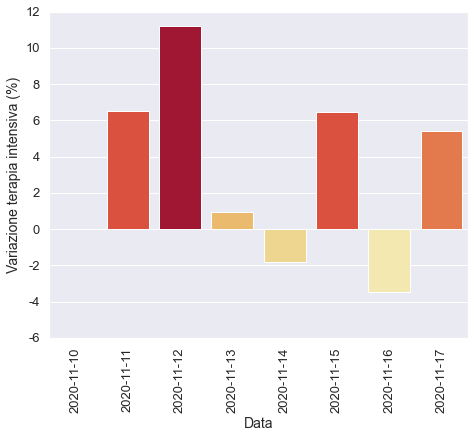

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

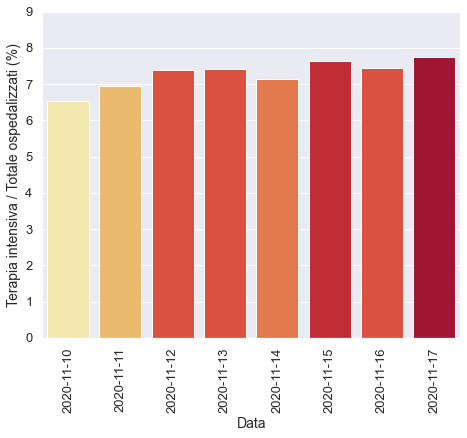

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

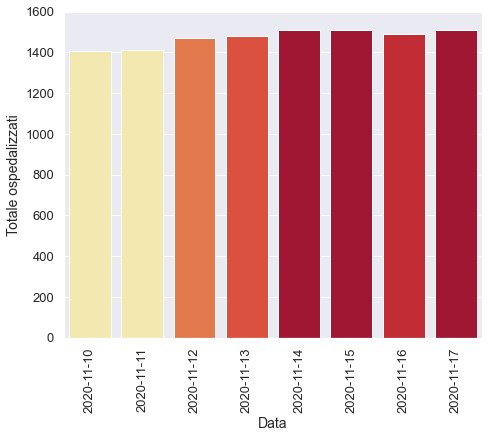

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

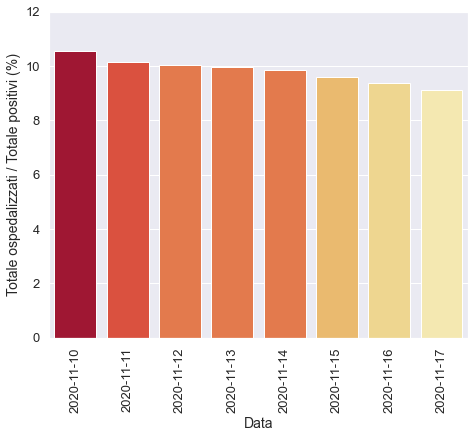

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

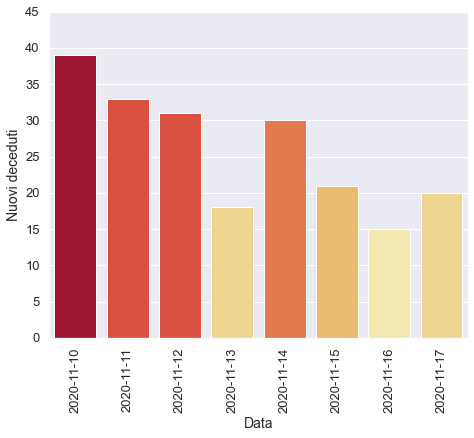

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

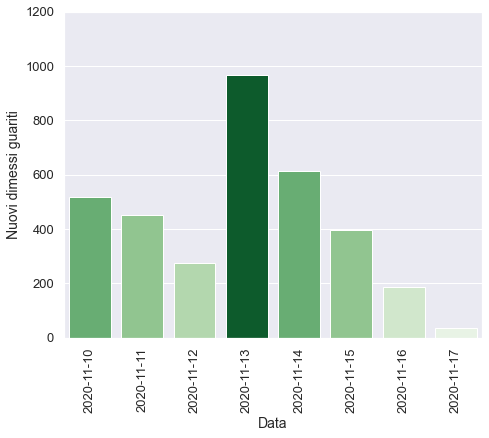

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)